# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units= "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather["coord"]["lon"] 
        city_max_temp = city_weather['main']['temp']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = datetime.fromtimestamp(city_weather['dt']).strftime('%y-%m-%d')

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | acarau
Processing Record 4 of Set 1 | turpan
Processing Record 5 of Set 1 | ca mau
Processing Record 6 of Set 1 | kangding
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | hawaiian paradise park
Processing Record 9 of Set 1 | iqaluit
Processing Record 10 of Set 1 | blackmans bay
Processing Record 11 of Set 1 | anadyr
Processing Record 12 of Set 1 | puerto baquerizo moreno
Processing Record 13 of Set 1 | lockport
Processing Record 14 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | saurimo
Processing Record 17 of Set 1 | gadzhiyevo
Processing Record 18 of Set 1 | tarrafal de sao nicolau
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | isafjordur
Processing Record 21

Processing Record 41 of Set 4 | bandundu
Processing Record 42 of Set 4 | porto novo
Processing Record 43 of Set 4 | barcelos
Processing Record 44 of Set 4 | kaiapoi
Processing Record 45 of Set 4 | holualoa
Processing Record 46 of Set 4 | fayetteville
Processing Record 47 of Set 4 | penukonda
Processing Record 48 of Set 4 | alice springs
Processing Record 49 of Set 4 | san luis de la loma
Processing Record 0 of Set 5 | antalaha
Processing Record 1 of Set 5 | klaksvik
Processing Record 2 of Set 5 | nhamunda
Processing Record 3 of Set 5 | qasr-e qand
City not found. Skipping...
Processing Record 4 of Set 5 | tralee
Processing Record 5 of Set 5 | chonchi
Processing Record 6 of Set 5 | byron bay
Processing Record 7 of Set 5 | yuzhno-kurilsk
Processing Record 8 of Set 5 | birjand
Processing Record 9 of Set 5 | kas
Processing Record 10 of Set 5 | kuybyshevo
Processing Record 11 of Set 5 | arona
Processing Record 12 of Set 5 | guozhen
Processing Record 13 of Set 5 | klyuchi
Processing Record 1

Processing Record 32 of Set 8 | balakhta
Processing Record 33 of Set 8 | kargasok
Processing Record 34 of Set 8 | altamira
Processing Record 35 of Set 8 | ghat
Processing Record 36 of Set 8 | hithadhoo
Processing Record 37 of Set 8 | nha trang
Processing Record 38 of Set 8 | hola
Processing Record 39 of Set 8 | chibougamau
Processing Record 40 of Set 8 | hastings
Processing Record 41 of Set 8 | beidao
Processing Record 42 of Set 8 | lubango
Processing Record 43 of Set 8 | polyarnyy
Processing Record 44 of Set 8 | bozeman
Processing Record 45 of Set 8 | pisco
Processing Record 46 of Set 8 | dryden
Processing Record 47 of Set 8 | taroa
Processing Record 48 of Set 8 | eydhafushi
Processing Record 49 of Set 8 | mount gambier
Processing Record 0 of Set 9 | qui nhon
Processing Record 1 of Set 9 | gaoping
Processing Record 2 of Set 9 | fort mcmurray
Processing Record 3 of Set 9 | ramanuj ganj
Processing Record 4 of Set 9 | necochea
Processing Record 5 of Set 9 | krasnogorskoye
Processing Reco

Processing Record 22 of Set 12 | dolisie
Processing Record 23 of Set 12 | kuanda
Processing Record 24 of Set 12 | yelizovo
Processing Record 25 of Set 12 | vrangel'
Processing Record 26 of Set 12 | coquimbo
Processing Record 27 of Set 12 | toyooka
Processing Record 28 of Set 12 | faya-largeau
Processing Record 29 of Set 12 | bosaso
Processing Record 30 of Set 12 | tranovaho
City not found. Skipping...
Processing Record 31 of Set 12 | alliance
Processing Record 32 of Set 12 | veraval
Processing Record 33 of Set 12 | namtsy
Processing Record 34 of Set 12 | shchigry
Processing Record 35 of Set 12 | villa mercedes
Processing Record 36 of Set 12 | paragominas
Processing Record 37 of Set 12 | quellon
Processing Record 38 of Set 12 | cuamba
Processing Record 39 of Set 12 | lahad datu
Processing Record 40 of Set 12 | dedovichi
Processing Record 41 of Set 12 | omuthiya
City not found. Skipping...
Processing Record 42 of Set 12 | soio
Processing Record 43 of Set 12 | san antonio del estrecho
Cit

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,21.60,77,98,5.44,PN,23-07-18
1,thompson,55.7435,-97.8558,21.09,49,40,1.54,CA,23-07-18
2,acarau,-2.8856,-40.1200,29.22,62,6,8.21,BR,23-07-18
3,turpan,42.9333,89.1667,36.13,16,14,1.93,CN,23-07-18
4,ca mau,9.1769,105.1500,25.78,88,100,4.12,VN,23-07-18


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,21.60,77,98,5.44,PN,23-07-18
1,thompson,55.7435,-97.8558,21.09,49,40,1.54,CA,23-07-18
2,acarau,-2.8856,-40.1200,29.22,62,6,8.21,BR,23-07-18
3,turpan,42.9333,89.1667,36.13,16,14,1.93,CN,23-07-18
4,ca mau,9.1769,105.1500,25.78,88,100,4.12,VN,23-07-18


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

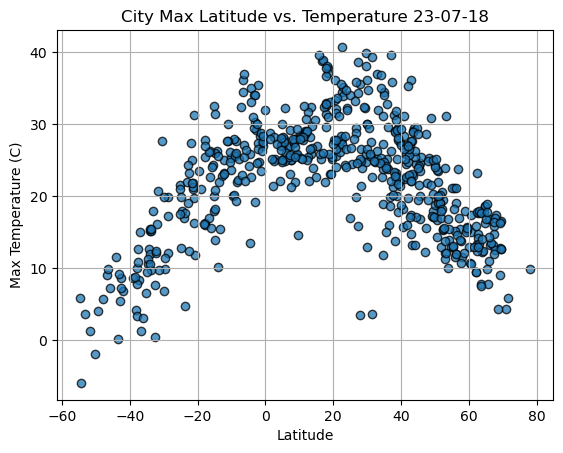

In [10]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o",edgecolors="black",alpha=0.75)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature " + str(city_data_df["Date"].head(1).values[0]))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

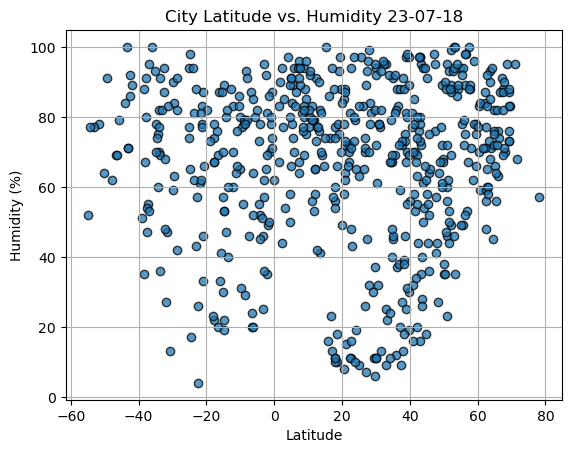

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o",edgecolors="black",alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity " + str(city_data_df["Date"].head(1).values[0]))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

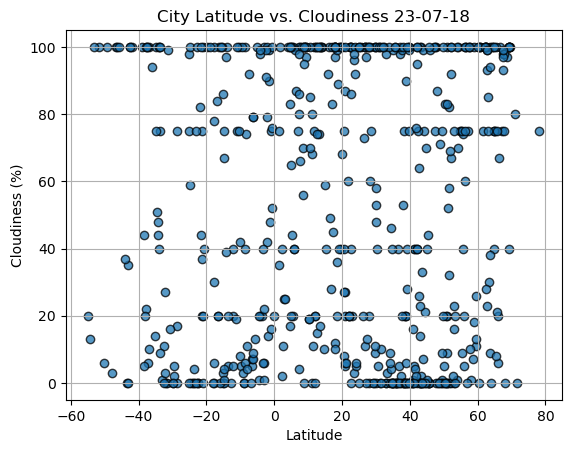

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o",edgecolors="black",alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness " + str(city_data_df["Date"].head(1).values[0]))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

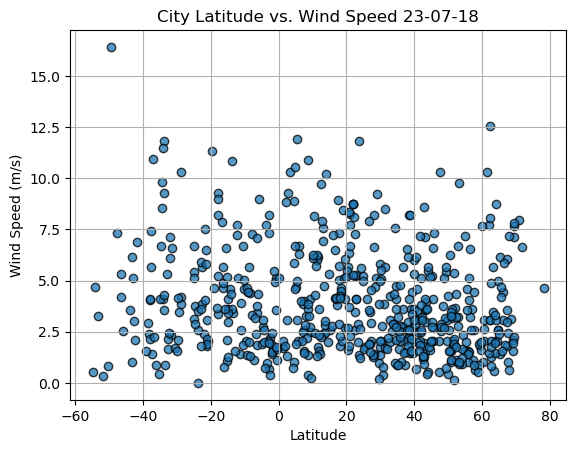

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o",edgecolors="black",alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed " + str(city_data_df["Date"].head(1).values[0]))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots
def create_lin_reg(df:pd.DataFrame, weather:str, xpos:int, ypos:int)->None:

    # Create base scatter plot
    df.plot.scatter(x='Lat', y=weather, s=40)
 
    # Calculate linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(df['Lat'], df[weather])
    regress = df['Lat'] * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

    # Plot linear regression line and equation
    plt.plot(df['Lat'], regress, color='red')
    plt.annotate(line_eq, (xpos, ypos), fontsize=15, color='red')

    # Add other graph properties
    plt.title(f"The r-value is: {rvalue}", loc='left')
    plt.xlabel('Latitude')

    # Display results
    plt.show()

In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_df = city_data_df.loc[city_data_df['Lat'] >= 0, :]


# Display sample data
northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,thompson,55.7435,-97.8558,21.09,49,40,1.54,CA,23-07-18
3,turpan,42.9333,89.1667,36.13,16,14,1.93,CN,23-07-18
4,ca mau,9.1769,105.1500,25.78,88,100,4.12,VN,23-07-18
5,kangding,30.0513,101.9603,12.91,94,58,1.36,CN,23-07-18
7,hawaiian paradise park,19.5933,-154.9731,25.18,88,100,4.12,US,23-07-18


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_df = city_data_df.loc[city_data_df['Lat'] < 0, :]

# Display sample data
southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,21.60,77,98,5.44,PN,23-07-18
2,acarau,-2.8856,-40.1200,29.22,62,6,8.21,BR,23-07-18
6,port-aux-francais,-49.3500,70.2167,4.12,91,100,16.42,TF,23-07-18
9,blackmans bay,-43.0167,147.3167,5.38,71,35,5.13,AU,23-07-18
11,puerto baquerizo moreno,-0.9000,-89.6000,27.55,78,75,5.14,EC,23-07-18


###  Temperature vs. Latitude Linear Regression Plot

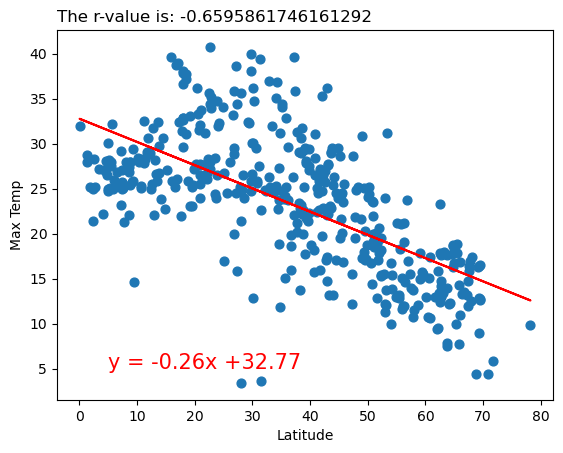

In [52]:
# Linear regression on Northern Hemisphere
create_lin_reg(northern_hemisphere_df, 'Max Temp', 5, 5)

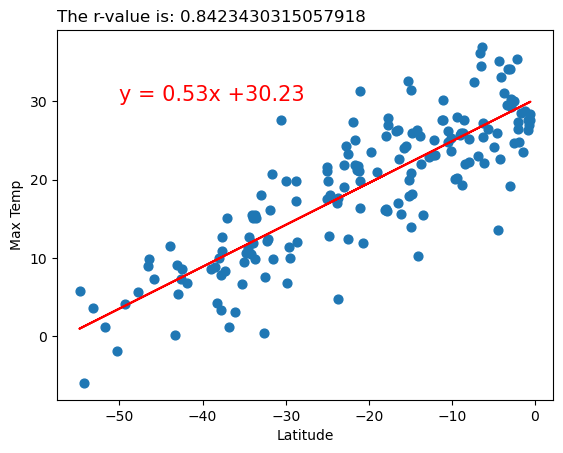

In [54]:
# Linear regression on Southern Hemisphere
create_lin_reg(southern_hemisphere_df, 'Max Temp', -50, 30)

**Discussion about the linear relationship:** In this section we can see the relationship between temperature and latitude, both in the Northern Hemisphere and in the Southern Hemisphere.

As for the Northern Hemisphere, an r-value of -0.6595 is observed, suggesting a moderate negative correlation between latitude and maximum temperature.

Since the r-value is negative, it indicates that as the latitude increases (towards the north pole), the maximum temperature tends to decrease. An r-value of -0.6595 indicates that the relationship is not perfectly linear, but there is a trend of decreasing maximum temperature as we move towards higher latitudes in the northern hemisphere.

In the Southern Hemisphere, the r-value was 0.8423 indicating a moderately strong positive correlation between latitude and maximum temperature. Therefore, it can be said that there is a significant relationship between latitude and maximum temperature in the southern hemisphere. As you move towards latitudes near 0, the maximum temperature is likely to increase as well.



### Humidity vs. Latitude Linear Regression Plot

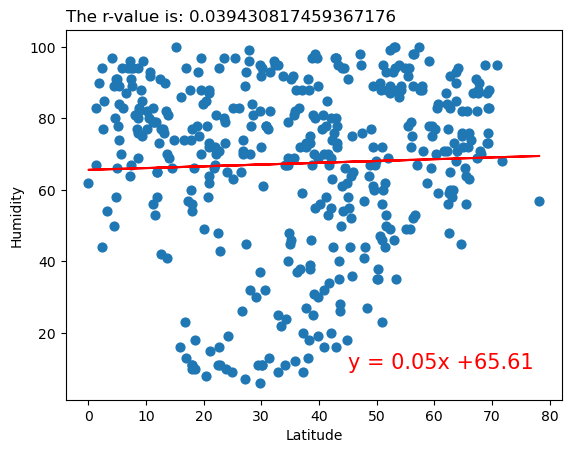

In [57]:
# Northern Hemisphere
create_lin_reg(northern_hemisphere_df, 'Humidity', 45, 10)

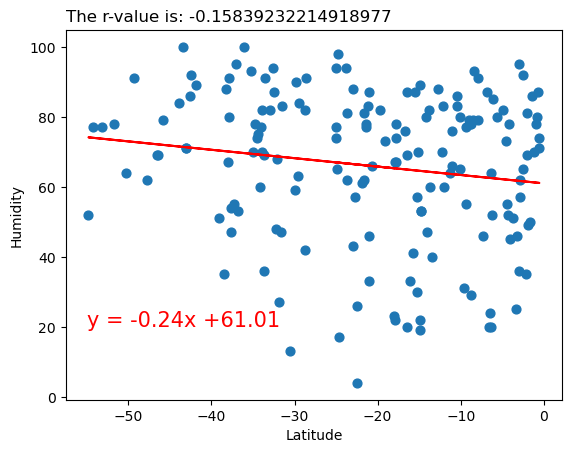

In [60]:
# Southern Hemisphere
create_lin_reg(southern_hemisphere_df, 'Humidity', -55, 20)

**Discussion about the linear relationship:** In this section we can see the relationship between humidity and latitude, both in the Northern Hemisphere and in the Southern Hemisphere.

An r-value of 0.03943 indicates a very weak correlation between latitude and humidity in the northern hemisphere. The value close to zero suggests that there is no significant linear relationship between these two variables in the analyzed data.

In practical terms, this means that latitude has a minimal influence on humidity in the Northern Hemisphere. The r-value of 0.03943 indicates that changes in latitude have a very weak correlation with changes in humidity.

In the Southern Hemisphere, the r-value obtained was 0.1583, indicating a weak correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

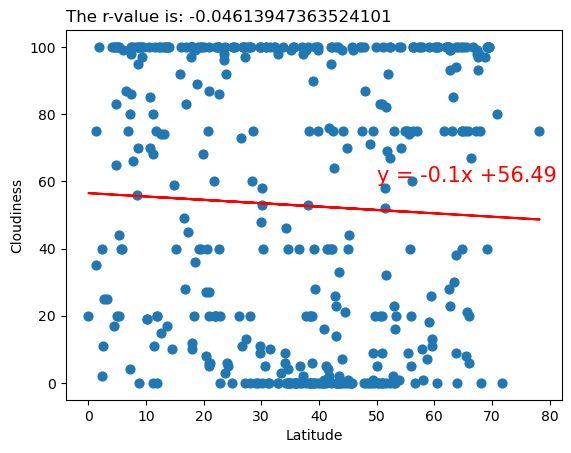

In [66]:
# Northern Hemisphere
create_lin_reg(northern_hemisphere_df, 'Cloudiness', 50, 60)

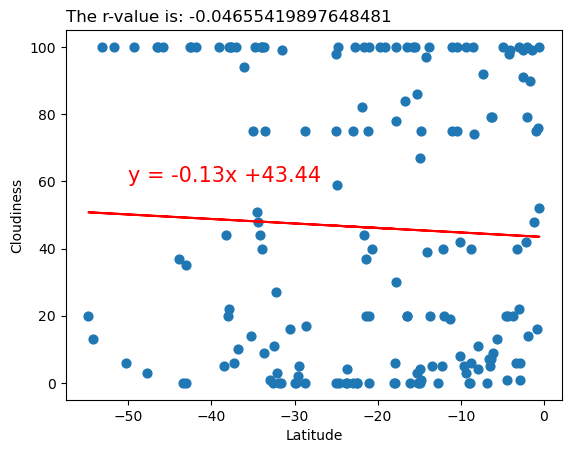

In [70]:
# Southern Hemisphere
create_lin_reg(southern_hemisphere_df, 'Cloudiness', -50, 60)

**Discussion about the linear relationship:** In this section we can see the relationship between Cloudiness and latitude, both in the Northern Hemisphere and in the Southern Hemisphere.

The r-value of -0.0461 indicates a very weak and practically non-existent correlation between latitude and cloudiness in the northern hemisphere. There is no significant linear relationship between these two variables.

This means that latitude has a minimal influence on cloudiness in the Northern Hemisphere. The r-value close to zero suggests that changes in latitude have a negligible correlation with changes in cloudiness. In other words, cloudiness cannot be easily predicted or inferred based solely on latitude in the Northern Hemisphere.

In the Southern Hemisphere, the r-value obtained was -0.0465, indicating a very weak correlation between latitude and the amount of cloudiness. Therefore, it can be said that there is no clear trend between latitude and the amount of cloudiness in the southern hemisphere.


### Wind Speed vs. Latitude Linear Regression Plot

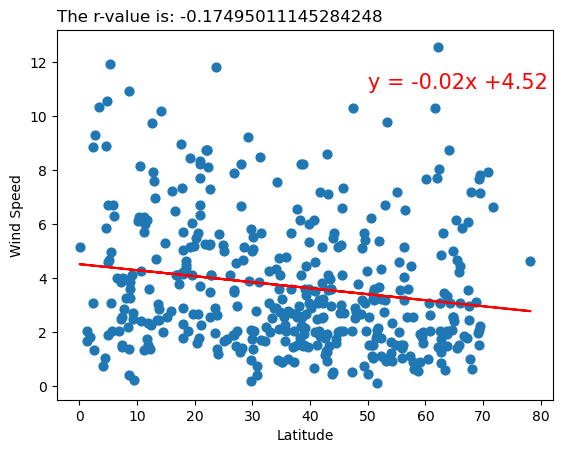

In [72]:
# Northern Hemisphere
create_lin_reg(northern_hemisphere_df, 'Wind Speed', 50, 11)

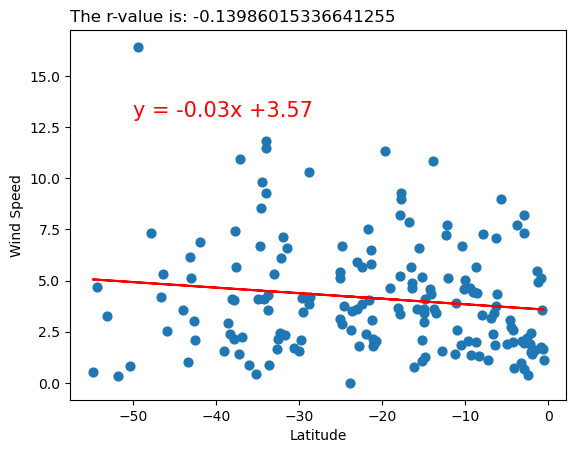

In [75]:
# Southern Hemisphere
create_lin_reg(southern_hemisphere_df, 'Wind Speed', -50, 13)

**Discussion about the linear relationship:** In this section we can see the relationship between Wind Speed and latitude, both in the Northern Hemisphere and in the Southern Hemisphere.

According to the result, the r-value is -0.1749 between latitude and wind speed in the northern hemisphere, indicating a weak and negative correlation between these two variables.

This means that there is a tendency, although not a very strong one, that as we move towards higher latitudes in the Northern Hemisphere, the wind speed tends to decrease slightly. However, the magnitude of the correlation is relatively low, suggesting that latitude is not a strong predictor for wind speed.

In the Southern Hemisphere, the r-value obtained was -0.0465, indicating a very weak correlation between latitude and wind speed. Therefore, it can be said that there is no clear trend between latitude and wind speed in the southern hemisphere.